# Heart Failure Prediction

In [240]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [241]:
df=pd.read_csv('heart.csv')
df.shape

(918, 12)

In [242]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [243]:
df.head(20)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


# Data Preprocessing

In [244]:
df.dtypes.value_counts()

int64      6
object     5
float64    1
dtype: int64

In [245]:
df=df.drop(['Oldpeak'],axis=1)
df=df.drop(['Cholesterol'],axis=1)

In [246]:
df.dtypes

Age                int64
Sex               object
ChestPainType     object
RestingBP          int64
FastingBS          int64
RestingECG        object
MaxHR              int64
ExerciseAngina    object
ST_Slope          object
HeartDisease       int64
dtype: object

In [247]:
df['FastingBS'].value_counts()
# So 'FastingBS' would more likely need to be an object datatype

0    704
1    214
Name: FastingBS, dtype: int64

In [248]:
#changing datatype of 'FastingBS' columns
df['FastingBS']=df['FastingBS'].astype('object')
df['FastingBS'].dtype
# 'O stands for object datatype'

dtype('O')

In [249]:
# Similarly changing datatype of heart disease to object
df['HeartDisease'] = df['HeartDisease'].astype('object')
df['HeartDisease'].dtype
# 'O stands for object datatype'

dtype('O')

In [250]:
continuous_columns=list()
categorical_columns=list()
for i in df.columns:
    if df[i].dtype=='O':
        categorical_columns.append(i)
    else:
        continuous_columns.append(i)
print('Continuous Columns :-','\n',continuous_columns,'\n')
print('Categorical Columns :-','\n',categorical_columns,'\n')

Continuous Columns :- 
 ['Age', 'RestingBP', 'MaxHR'] 

Categorical Columns :- 
 ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease'] 



In [251]:
df.isnull().sum()
# No Missing values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
ST_Slope          0
HeartDisease      0
dtype: int64

In [252]:
df.dtypes.value_counts()

object    7
int64     3
dtype: int64

# Analysis

In [253]:
df.describe()

,Age,RestingBP,MaxHR
count,918.000000,918.000000,918.000000
mean,53.510893,132.396514,136.809368
std,9.432617,18.514154,25.460334
min,28.000000,0.000000,60.000000
25%,47.000000,120.000000,120.000000
50%,54.000000,130.000000,138.000000
75%,60.000000,140.000000,156.000000
max,77.000000,200.000000,202.000000


In [254]:
temp=1
for i in categorical_columns:
    print(temp,i,'\n')
    print(df[i].value_counts())
    print('\n','\n')
    temp=temp+1

1 Sex 

M    725
F    193
Name: Sex, dtype: int64

 

2 ChestPainType 

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

 

3 FastingBS 

0    704
1    214
Name: FastingBS, dtype: int64

 

4 RestingECG 

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

 

5 ExerciseAngina 

N    547
Y    371
Name: ExerciseAngina, dtype: int64

 

6 ST_Slope 

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

 

7 HeartDisease 

1    508
0    410
Name: HeartDisease, dtype: int64

 



## Univariate Analysis

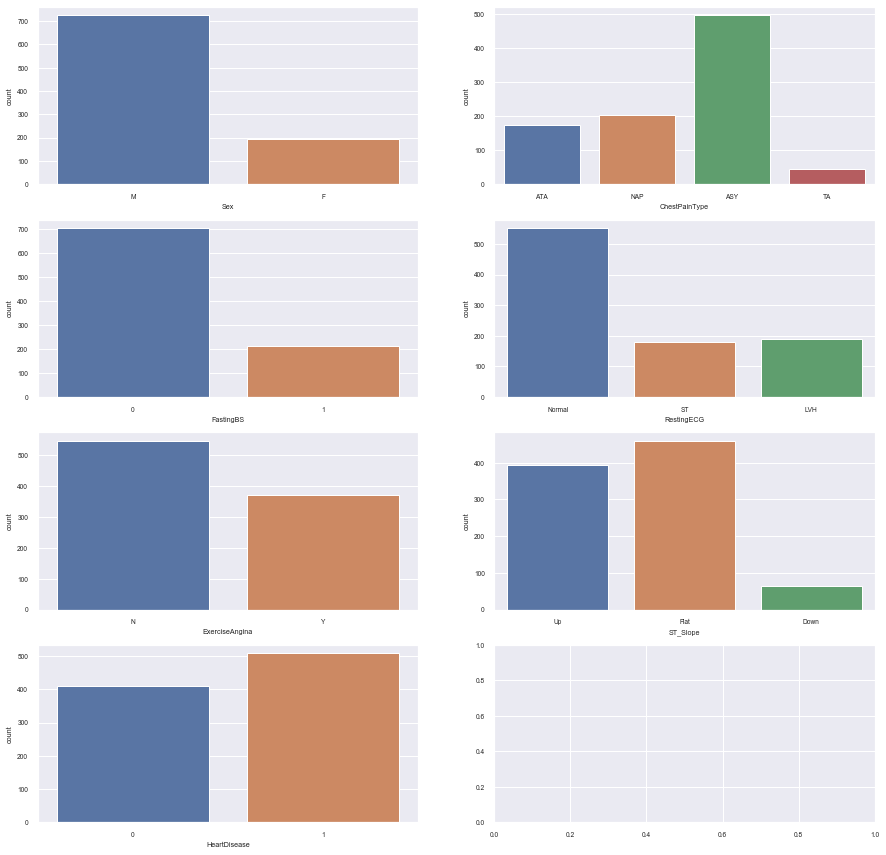

In [255]:
# Plotting plots
# fontsize pending
fig, ax=plt.subplots(4,2,figsize=(15,15))
i=0
j=0
temp=0
#colors=['b','purple','yellow','c','m','pink']
for column in categorical_columns:
    if j==2:
        i=i+1
        j=0
    #df[column].plot.bar(ax=ax[i,j],figsize=(15,15),color=colors[temp],fontsize=12).set_title(column,fontsize=25)
    sns.countplot(x=column,data=df,ax=ax[i,j])
    sns.set(font_scale=0.6)
    #g(fontsize=20)
    j=j+1
    temp=temp+1


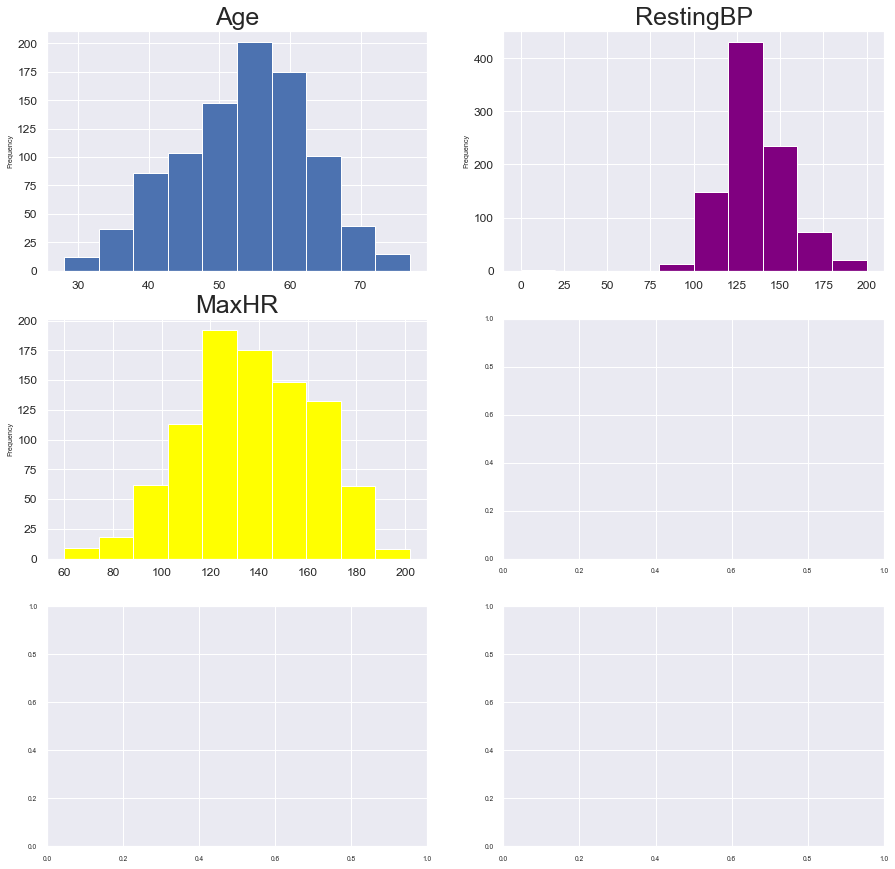

In [256]:
# Using matplotlib library to plot all plots as subplots
fig, ax=plt.subplots(3,2) # six cont. variables so six sub-plots
i=0
j=0
temp=0
colors=['b','purple','yellow','c','m']
for column in continuous_columns:
    if(j==2):
        i=i+1
        j=0
    df[column].plot.hist(ax=ax[i,j],figsize=(15,15),color=colors[temp],fontsize=12).set_title(column,fontsize=25)
    j=j+1
    temp=temp+1

# Scaling
numeric=df.select_dtypes(exclude=object).columns

from sklearn.preprocessing import MinMaxScaler
for col in numeric:
    df[col]=MinMaxScaler().fit_transform(df[col])


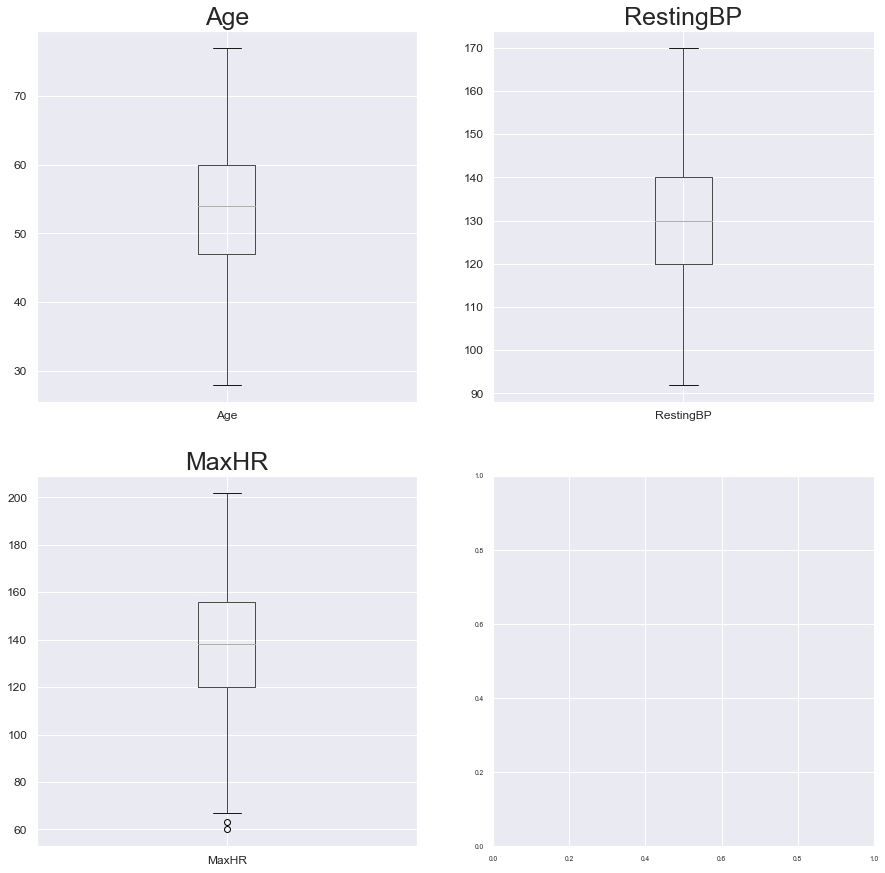

In [264]:
# Using matplotlib library to plot all plots as subplots
fig, ax=plt.subplots(2,2,figsize=(15,15))
i=0
j=0
temp=0
colors=['b','purple','yellow','c','m','pink']
for column in continuous_columns:
    if j==2:
        i=i+1
        j=0
    df.boxplot(column,ax=ax[i,j],figsize=(15,15),fontsize=12).set_title(column,fontsize=25)
    j=j+1
    temp=temp+1

In [258]:
# removing all rows with restingBp=0
df=df.drop(df[(df['RestingBP'] == 0)].index)

In [259]:
# dealing with otliers in restingbp
q1 = df['RestingBP'].quantile(0.25)
q3 = df['RestingBP'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr

u = df[(df['RestingBP'] >= Upper_tail) | (df['RestingBP'] <= Lower_tail)] 
u = pd.DataFrame(u)
print('Outliers on RestingBP:')
u['HeartDisease'].value_counts()

Outliers on RestingBP:


1    28
0    13
Name: HeartDisease, dtype: int64

In [260]:
# Median imputation (RestingBP)
med = np.median(df['RestingBP'])
for i in df['RestingBP']:
    if i > Upper_tail or i < Lower_tail:
            df['RestingBP'] = df['RestingBP'].replace(i, med)

In [266]:
# Changing back the dummies features to numeric 
df['FastingBS'] = df['FastingBS'].astype(int)
df['HeartDisease'] = df['HeartDisease'].astype(int)

In [267]:
# Select categorical variables
categ = df.select_dtypes(include=object).columns

# One hot encoding
df = pd.get_dummies(df, columns=categ, drop_first=True)  
df.head()

,Age,RestingBP,FastingBS,MaxHR,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,0,172,0,1,1,0,0,1,0,0,0,1
1,49,160,0,156,1,0,0,1,0,1,0,0,1,0
2,37,130,0,98,0,1,1,0,0,0,1,0,0,1
3,48,138,0,108,1,0,0,0,0,1,0,1,1,0
4,54,150,0,122,0,1,0,1,0,1,0,0,0,1


# Modelling

In [268]:
from sklearn.model_selection import train_test_split

# Set up X and y variables
y= df['HeartDisease']
X=df.drop(columns='HeartDisease')

# Split the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#print('g')

In [269]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(641, 13)
(276, 13)
(641,)
(276,)


# Logistic regression

In [273]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Standard logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 4))
print('F1 Score: ', round(f1_score(y_test, y_pred), 4))

import warnings
warnings.simplefilter(action='ignore')

Accuracy score:  0.8696
F1 Score:  0.8896


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
